In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gas sector:


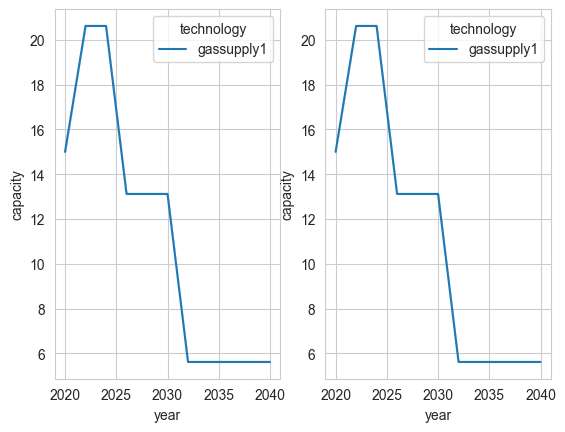

power sector:


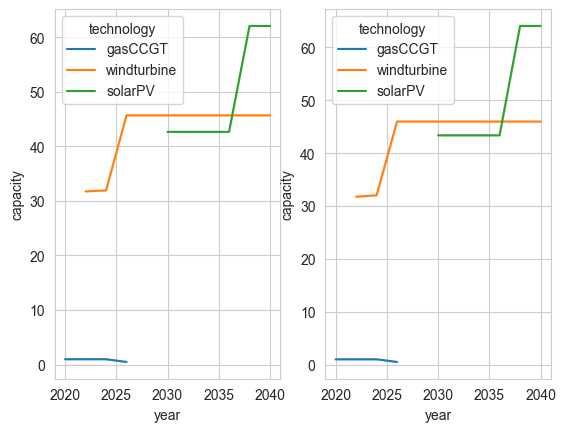

residential sector:


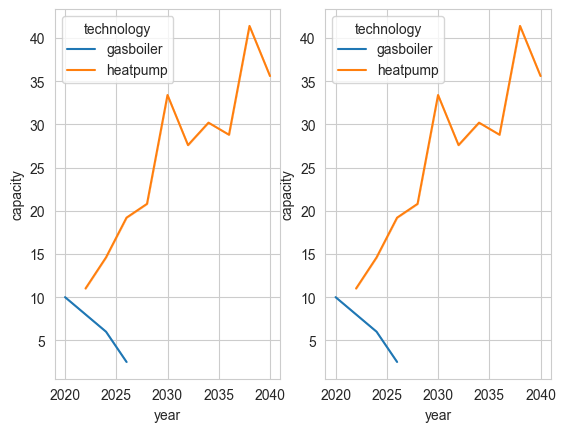

In [6]:
mca_capacity = pd.read_csv("Results/MCACapacity.csv")

for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    fig, ax =plt.subplots(1,2)
    sns.lineplot(data=sector[sector.region=="R1"], x="year", y="capacity", hue="technology", ax=ax[0])
    sns.lineplot(data=sector[sector.region=="R2"], x="year", y="capacity", hue="technology", ax=ax[1])
    plt.show()
    plt.close()

In [7]:
from pathlib import Path

path = 'Results/Residential/Capacity/'

all_files = Path(path).glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    year_needed = filename.stem
    filtered_year = df[df.year==int(year_needed)]
    li.append(filtered_year)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,asset,year,region,technology,installed,capacity
0,0,2020,R1,gasboiler,2020,20.0
1,2,2020,R2,gasboiler,2020,20.0
2,0,2022,R1,gasboiler,2020,16.0
3,1,2022,R1,heatpump,2020,22.0
4,4,2022,R2,gasboiler,2020,16.0
...,...,...,...,...,...,...
91,21,2040,R2,heatpump,2030,10.4
92,23,2040,R2,heatpump,2032,12.4
93,25,2040,R2,heatpump,2034,6.4
94,27,2040,R2,heatpump,2036,28.4


C:\Users\dalonsoa\Projects\MUSE_OS\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


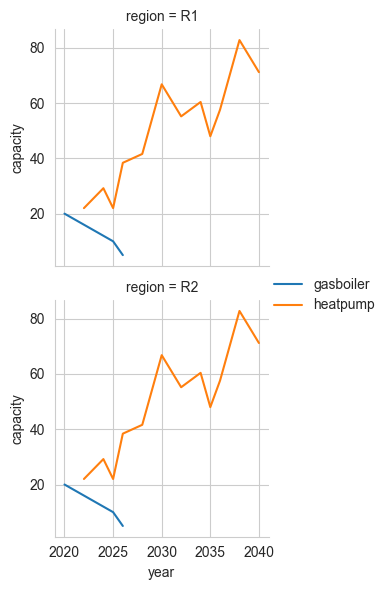

In [8]:
grouped_by = frame.groupby(["year", "technology","region"]).sum().reset_index()
grouped_by

g = sns.FacetGrid(data=grouped_by, row="region")
g.map(sns.lineplot, "year", "capacity", "technology")
g.add_legend()